# TCLab Overview

The `tclab` package provides a set of Python tools for interfacing with the [BYU Temperature Control Laboratory](http://apmonitor.com/pdc/index.php/Main/ArduinoTemperatureControl). The Temperature Control Laboratory consists of two heaters and two temperature sensors mounted on an Arduino microcontroller board. Together, the `tclab` package and the Temperature Control Laboratory provide a low-cost experimental platform for implementing algorithms commonly used for process control.

![](images/tclab_device.png) 

## TCLab Architecture

The `tclab` package is intended to be used as a teaching tool. The package provides high-level access to sensors, heaters, a pseudo-realtime clock. The package includes the following Python classes and functions:

* `TCLab()` providing access to the Temperature Control Laboratory hardware.
* `TCLabModel()` providing access to a simulation of the Temperature Control Laboratory hardware. 
* `clock` for synchronizing with a real time clock.
* `Historian` for data logging.
* `Plotter` for realtime plotting.

![](images/TCLabOverview.png)

Using these Python tools, students can create Jupyter notebooks and python codes covering a wide range of topics in process control.

* **tclab.py:** A Python package providing high-level access to sensors, heaters, a pseudo-realtime clock. The package includes `TCLab()` providing access to the device, `clock` for synchronizing with a real time clock, `Historian` for data logging, and `Plotter` for realtime plotting.

* **TCLab-sketch.ino:** Firmware for the intrisically safe operation of the Arduino board and shield. The sketch is available at [https://github.com/jckantor/TCLab-sketch](https://github.com/jckantor/TCLab-sketch).

* **Arduino:** Hardware platform for the Temperature Control Laboratory. TCLab is compatiable with Arduino Uno, Arduino Leonardo, and compatible clones.

## Getting Started

### Installation

Install using

    pip install tclab
   
To upgrade an existing installation, use the command

    pip install tclab --upgrade

### Hardware Setup

1. Plug a compatible Arduino device (UNO, Leonardo, NHduino) with the
   lab attached into your computer via the USB connection. Plug the DC
   power adapter into the wall.

2. (optional) Install Arduino Drivers.

   *If you are using Windows 10, the Arduino board should connect without additional drivers required.*

   Mac OS X users may need to install a serial driver. For Arduino clones using the CH340G, CH34G or CH34X chipset, a suitable driver can be found at [https://github.com/MPParsley/ch340g-ch34g-ch34x-mac-os-x-driver]() or [https://github.com/adrianmihalko/ch340g-ch34g-ch34x-mac-os-x-driver]().

3. (optional) Install Arduino Firmware;

   `TCLab` requires the one-time installation of custom firmware on an Arduino device. If it hasn't been pre-installed, the necessary firmware and instructions are available from the [TCLab-Sketch repository](https://github.com/jckantor/TCLab-sketch).

### Checking Everything Works

Execute the following code

    import tclab
    tclab.TCLab().T1

If everything has worked, you should see the following output message

    Connecting to TCLab
    TCLab Firmware Version 1.2.1 on NHduino connected to port XXXX
    21.54

The number returned is the temperature of sensor T1 in °C.

## Next Steps

The notebook directory provides examples on how to use the TCLab module.

### Course Web Sites

More information, instructional videos, and Jupyter notebook
examples are available at the following course websites.

* Arduino temperature control lab page [http://apmonitor.com/pdc/index.php/Main/ArduinoTemperatureControl]() on the BYU Process Dynamics and Control course website.
* [CBE 30338 <http://jckantor.github.io/CBE30338/]() for the Notre Dame
  Chemical Process Control course website.

# Accessing the Temperature Control Laboratory

## Importing `tclab`

Once installed the package can be imported into Python and an instance created with the Python statements

    import tclab
    lab = tclab.TCLab()

`tclab.setup()` creates an instance of a class the provides access to temperature measurements, heaters, and led on board the Temperature Control Laboratory. When called with no arguments,  attempts to find a device connected to a serial port and returns a connection. An error is generated if no device is found.  The connection should be closed with

    lab.close()
    
when no longer in use. The following cell demonstrates this process, and uses the tclab `LED()` function to flash the LED on the Temperature Control Lab for a period of 10 seconds at a 100% brightness level. 

In [1]:
import tclab

lab = tclab.TCLab()
lab.LED(100)
lab.close()

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


## Using TCLab with Python's `with` statement

The Python `with` statement provides a simple means of setting up and closing a connection to the Temperature Control Laboratory. The with statement establishes a context where a tclab instance is created, assigned to a variable, and automatically closed upon completion.

In [2]:
import tclab

with tclab.TCLab() as lab:
    lab.LED(100)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
TCLab disconnected successfully.


The `with` statement is likely to be the most common way to connect the Temperature Control Laboratory for most uses.

## Reading Temperatures

Once a tclab instance is created and connected to a device, the temperature sensors on the temperature control lab can be acccessed with the attributes `.T1` and `.T2`.  For example, given an instance `lab`, the temperatures are accessed as

    T1 = lab.T1
    T2 = a.T2

Note that `lab.T1` and `lab.T2` are read-only properties. Any attempt to set them to a value will return a Python error.

In [10]:
import tclab

with tclab.TCLab() as lab:
    print("Temperature 1: {0:0.2f} °C".format(lab.T1))
    print("Temperature 2: {0:0.2f} °C".format(lab.T2))

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Temperature 1: 19.62 °C
Temperature 2: 18.65 °C
TCLab disconnected successfully.


## Setting Heaters

The heaters are controlled by functions `.Q1()` and `.Q2()` of a tclab instance. For example, both heaters can be set to 100% power with the functions

    lab.Q1(100)
    lab.Q2(100)

The device firmware limits the heaters to a range of 0 to 100%. The current value of attributes may be accessed via

    Q1 = lab.Q1()
    Q2 = lab.Q2()
    
Note that the retrieved values may be different due to the range-limiting enforced by the device firmware.

Alternatively, the heaters can also be specified with the properties `.U1` and `.U2`. Thus setting

    lab.U1 = 100
    lab.U2 = 100
    
would set both heaters to 100% power. The current value of the heaters can be accessed as

    print("Current setting of heater 1 is", lab.U1, "%")
    print("Current setting of heater 2 is", lab.U2, "%")
    
The choice to use a function (i.e, `.Q1()` and `.Q2()`) or a property (i.e, `.U1` or `.U2`) to set and access heater settings is a matter of user preference.

In [4]:
import tclab
import time

with tclab.TCLab() as lab:
    print("\nStarting Temperature 1: {0:0.2f} °C".format(lab.T1),flush=True)
    print("Starting Temperature 2: {0:0.2f} °C".format(lab.T2),flush=True)

    lab.Q1(100)
    lab.Q2(100)
    print("\nSet Heater 1:", lab.Q1(), "%",flush=True)
    print("Set Heater 2:", lab.Q2(), "%",flush=True)
    
    t_heat = 30
    print("\nHeat for", t_heat, "seconds")
    time.sleep(t_heat)

    print("\nTurn Heaters Off")
    lab.Q1(0)
    lab.Q2(0)
    print("\nSet Heater 1:", lab.Q1(), "%",flush=True)
    print("Set Heater 2:", lab.Q2(), "%",flush=True)
    
    print("\nFinal Temperature 1: {0:0.2f} °C".format(lab.T1))
    print("Final Temperature 2: {0:0.2f} °C".format(lab.T2))

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.

Starting Temperature 1: 20.26 °C
Starting Temperature 2: 19.29 °C

Set Heater 1: 100.0 %
Set Heater 2: 100.0 %

Heat for 30 seconds

Turn Heaters Off

Set Heater 1: 0.0 %
Set Heater 2: 0.0 %

Final Temperature 1: 20.26 °C
Final Temperature 2: 19.29 °C
TCLab disconnected successfully.


## Setting Maximum Heater Power

The control inputs to the heaters power is normally set with functions `.Q1()` and `.Q2()` (or properties `.U1` and `.U2`) specifying a value in a range from 0 to 100% of maximum heater power.  

The values of maximum heater power are specified in firmware with values in the range from 0 to 255. The default values are 200 for heater 1 and 100 for heater 2. The maximum heater power can be retrieved and set by properties `P1` and `P2`. The following code, for example, sets both heaters to a maximum power of 100.

In [9]:
import tclab

with tclab.TCLab() as lab:
    print("Maximum power of heater 1 = ", lab.P1)
    print("Maximum power of heater 2 = ", lab.P2)
    
    print("Adjusting the maximum power of heater 1.")
    lab.P1 = 100
    
    print("Maximum power of heater 1 = ", lab.P1)
    print("Maximum power of heater 2 = ", lab.P2)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Maximum power of heater 1 =  200.0
Maximum power of heater 2 =  100.0
Adjusting the maximum power of heater 1.
Maximum power of heater 1 =  100.0
Maximum power of heater 2 =  100.0
TCLab disconnected successfully.


The actual power supplied to the heaters is a function of the power supply voltage applied to the Temperature Control Lab shield,

The maximum power applied to the heaters is a product of the settings (`P1`,`P2`) and of the power supply used with the TCLab hardware. The TCLab hardware is normally used with a 5 watt USB power supply capable of supply up to 1 amp at 5 volts. 

The TCLab hardware actually draws more than 1 amp when both `P1` and `P2` are set to 255 and `Q1` and `Q2` are at 100%. This situation will overload the power supply and result in the power supply shutting down. Normally the power supply will reset itself after unplugging from the power mains.

Experience with the device shows keeping the sum `P1` and `P2` to a value less than 300 will avoid problems with the 5 watt power supply. If you have access to larger power supplies, then you can adjust `P1` and `P2` accordingly to achieve a wider range of temperatures.

# Synchronizing with Real Time

## Simple use of `tclab.clock()`

The tclab module includes a function `clock` for synchronizing calculations with real time.  `clock(tperiod)` is an iterator that generates a sequence of equally spaced time steps from zero to `tperiod`  separated by one second intervals. For each step `clock` returns time since start rounded to the nearest 10th of a second.

In [10]:
import tclab

tperiod = 5
for t in tclab.clock(tperiod):
    print(t, "sec.")

0 sec.
1.0 sec.
2.0 sec.
3.0 sec.
4.0 sec.
5.0 sec.


`tclab.clock()` is implemented as a Python generator using the Python library `time.sleep()` function. A consequence of this implementation is that `tclab.clock()` is 'blocking' which limits its use for creating interactive demonstrations. See later sections of this user's guide for non-blocking alternatives that can be used for interactive demonstrations or GUI's.

## Optional Parameters

### `tstep`: Clock time step

An optional parameter `tstep` specifies a time step different from one second.

In [7]:
import tclab

tperiod = 5
tstep = 2.5
for t in tclab.clock(tperiod,tstep):
    print(t, "sec.")

0 sec.
2.5 sec.
5.0 sec.


### `tol`: Clock tolerance

There are some considerations when using `clock`. First, by its nature Python is not a real-time environment. `clock` makes a best effort to stay in sync with the wall clock but there can be no guarantees. The default behavior of `clock` is to maintain long-term synchronization with the real time clock. A `RuntimeError` is raised if the difference between clock time and real time is greater than the optional parameter `tol` (default value of 0.25).

The following cell demonstrates the use of `tol` to avoid run time errors due to an intermittent calculation that exceeds the time step specified by `tstep`. In this instance, an extra `sleep` timeout of 0.2 seconds occurs at t=1 and t=2. Together these cause the clock to be delayed a total of 0.4 seconds relative to real time. The default tolerance of 0.25 second would cause a run time error to be generated. Setting tol=0.5 avoids raising that exception.

In [15]:
import tclab
import time

tfinal = 5
tstep = 1

for t in tclab.clock(tfinal, tstep, tol=0.5):
    print(t, "sec.")
    if 0.5 < t < 2.5:
        time.sleep(1.2)

0 sec.
1.0 sec.
2.2 sec.
3.4 sec.
4.0 sec.
5.0 sec.


### Fixing run time errors due to loss of clock synchronization.

If you encounter a `RuntimeError` due to loss of synchronization, there are normally two remedies depending on the underlying cause:

1. Synchronization can be lost if you attempting to multitask (say do some web browsing) while an experiment is underway. In this case you should increase the `tol` to a larger value.
2. Synchronization can be lost if the loop includes lengthy calculations, such as a computationally intensive control calculation. In the case it may be necessary to increase the `tstep` parameter.

## Using `tclab.clock()` with TCLab

The `tclab.clock()` generator can be used to implement and test control and estimation algorithms using the the Temperature Control Laboratory.

In [11]:
import tclab

tfinal = 20
tstep = 2

with tclab.TCLab() as lab:
    lab.Q1(100)
    lab.Q2(100)
    print("\nSet Heater 1 to {0:f} %".format(lab.Q1()))
    print("Set Heater 2 to {0:f} %".format(lab.Q2()))

    sfmt = "   {0:5.1f} sec:   T1 = {1:0.1f} °C    T2 = {2:0.1f} °C"
    for t in tclab.clock(tfinal, tstep):
        print(sfmt.format(t, lab.T1, lab.T2), flush=True)

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.

Set Heater 1 to 100.000000 %
Set Heater 2 to 100.000000 %
     0.0 sec:   T1 = 23.2 °C    T2 = 21.9 °C
     2.0 sec:   T1 = 23.2 °C    T2 = 20.6 °C
     4.0 sec:   T1 = 23.2 °C    T2 = 20.6 °C
     6.0 sec:   T1 = 23.2 °C    T2 = 20.6 °C
     8.0 sec:   T1 = 23.5 °C    T2 = 20.9 °C
    10.0 sec:   T1 = 23.5 °C    T2 = 20.9 °C
    12.0 sec:   T1 = 23.8 °C    T2 = 20.9 °C
    14.0 sec:   T1 = 24.4 °C    T2 = 22.2 °C
    16.0 sec:   T1 = 24.4 °C    T2 = 22.2 °C
    18.0 sec:   T1 = 25.1 °C    T2 = 22.5 °C
    20.0 sec:   T1 = 25.4 °C    T2 = 22.8 °C
TCLab disconnected successfully.


# TCLab `Historian`

## Basic logging

The `tclab.Historian` class provides data logging. Given an instance of a TCLab object, an historian is created with the commands

    import tclab
    lab = tclab.TCLab()
    h = tclab.Historian(lab.sources)
    
The historian initializes a data log. The sources for the data log are specified in the argument to `tclab.Historian`. A default set of sources for an instance `lab` is given by `lab.sources`. (The specification for sources is described in a later section.)

The data log is updated by issuing a command

    h.update(t)
    
Where `t` is the current clock time. If `t` is omitted the historian will calculate its own time.

In [17]:
import tclab

with tclab.TCLab() as lab:
    h = tclab.Historian(lab.sources)
    for t in tclab.clock(20):
        lab.Q1(100 if t <= 10 else 0)
        print("Time:", t, 'seconds')
        h.update(t)        

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Time: 0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
Time: 11.0 seconds
Time: 12.0 seconds
Time: 13.0 seconds
Time: 14.0 seconds
Time: 15.0 seconds
Time: 16.0 seconds
Time: 17.0 seconds
Time: 18.0 seconds
Time: 19.0 seconds
Time: 20.0 seconds
TCLab disconnected successfully.


## Accessing the Data Log from the Historian

`Historian` maintains a data log that is updated on each encounter of the `.update()` function. The list of variables logged by an Historian is given by

In [20]:
h.columns

['Time', 'T1', 'T2', 'Q1', 'Q2']

Individual time series are available as elements of `Historian.fields`. For the default set of sources, the time series can be obtained as

    t, T1, T2, Q1, Q2 = h.fields 

For example, here's how to plot the history of temperature T1 versus time from the example above.

<IPython.core.display.Javascript object>


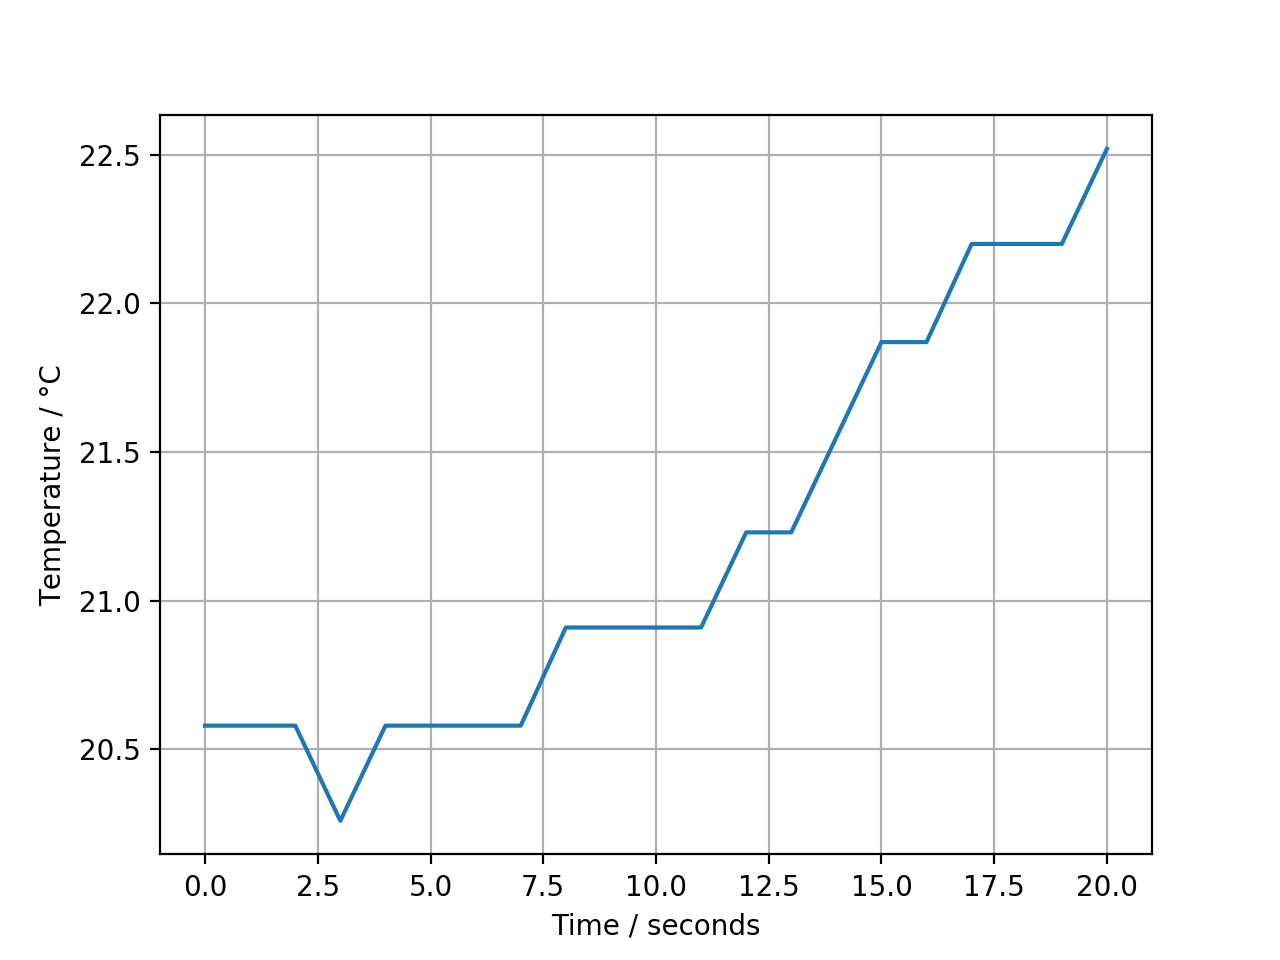

In [21]:
%matplotlib notebook
import matplotlib.pyplot as plt

t, T1, T2, Q1, Q2 = h.fields 
plt.plot(t, T1)
plt.xlabel('Time / seconds')
plt.ylabel('Temperature / °C')
plt.grid()

A sample code demonstrating how to plot the historian log.

<IPython.core.display.Javascript object>


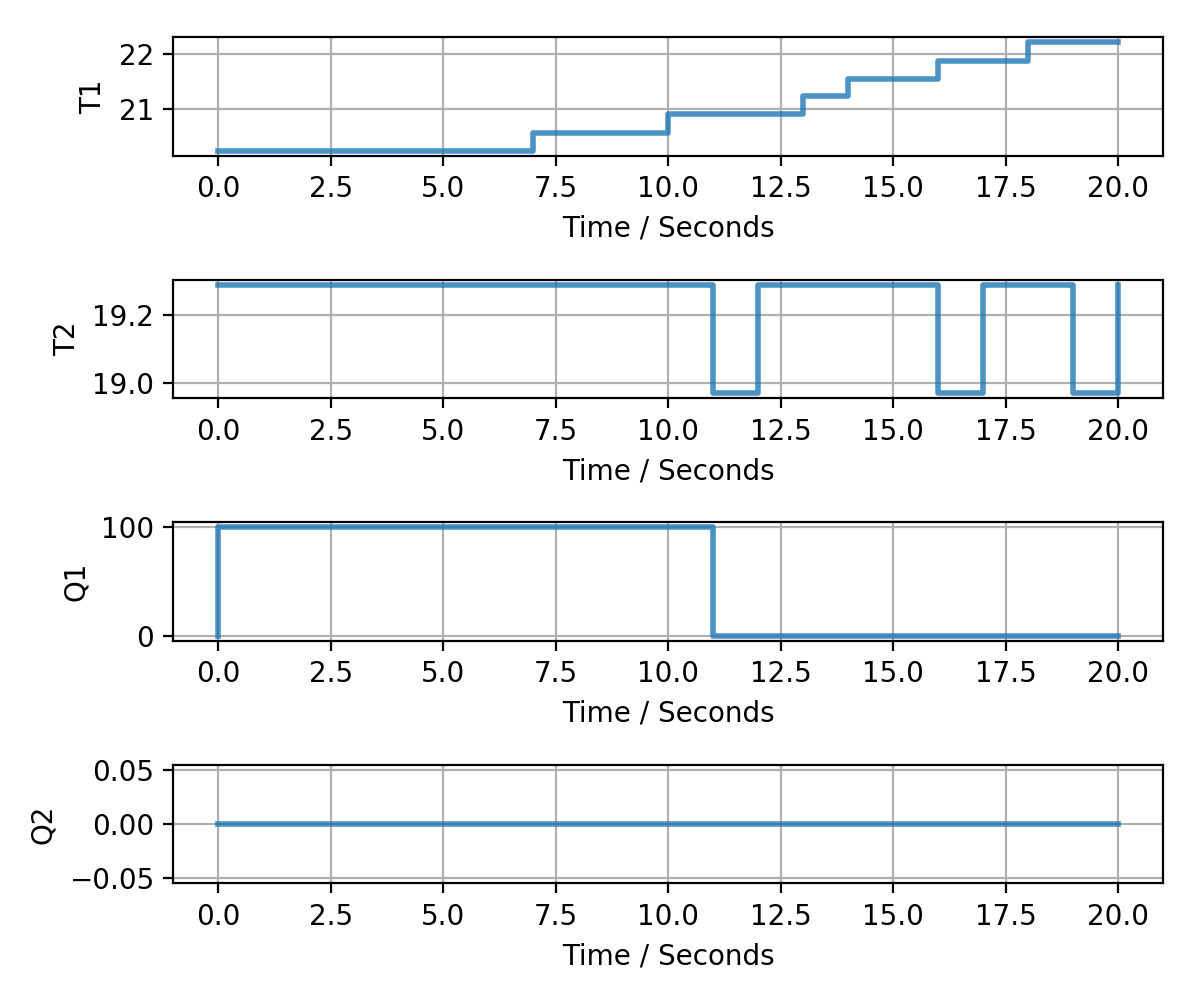

In [11]:
def plotlog(historian):
    line_options = {'lw': 2, 'alpha': 0.8}
    fig = plt.figure(figsize=(6, 5))
    nplots = len(h.columns) - 1
    t = historian.fields[0]
    for n in range(1, nplots+1):
        plt.subplot(nplots,1,n)
        y = historian.fields[n]
        plt.step(t, y, where='post', **line_options)          
        plt.grid()
        plt.xlabel('Time / Seconds')
        plt.ylabel(historian.columns[n])
    plt.tight_layout()
    
plotlog(h)

## Accessing log data using Pandas

Pandas is a widely use Python library for manipulation and analysis of data sets. Here we show how to access the `tclab.Historian` log using Pandas.

The entire data history is available from the historian as the attribute `.log`. Here we show the first three rows from the log:

In [22]:
h.log[:3]

[(0, 20.58, 18.65, 0.0, 0.0),
 (0, 20.58, 18.65, 100.0, 0.0),
 (1.0, 20.58, 18.65, 100.0, 0.0)]

The log can be converted to a Pandas dataframe.

In [23]:
import pandas as pd

df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.head()

,T1,T2,Q1,Q2
Time,,,,
0.0,20.58,18.65,0.0,0.0
0.0,20.58,18.65,100.0,0.0
1.0,20.58,18.65,100.0,0.0
2.0,20.58,18.65,100.0,0.0
3.0,20.26,18.65,100.0,0.0


The following cells provide examples of plots that can be constructed once the data log has been converted to a pandas dataframe.

<IPython.core.display.Javascript object>


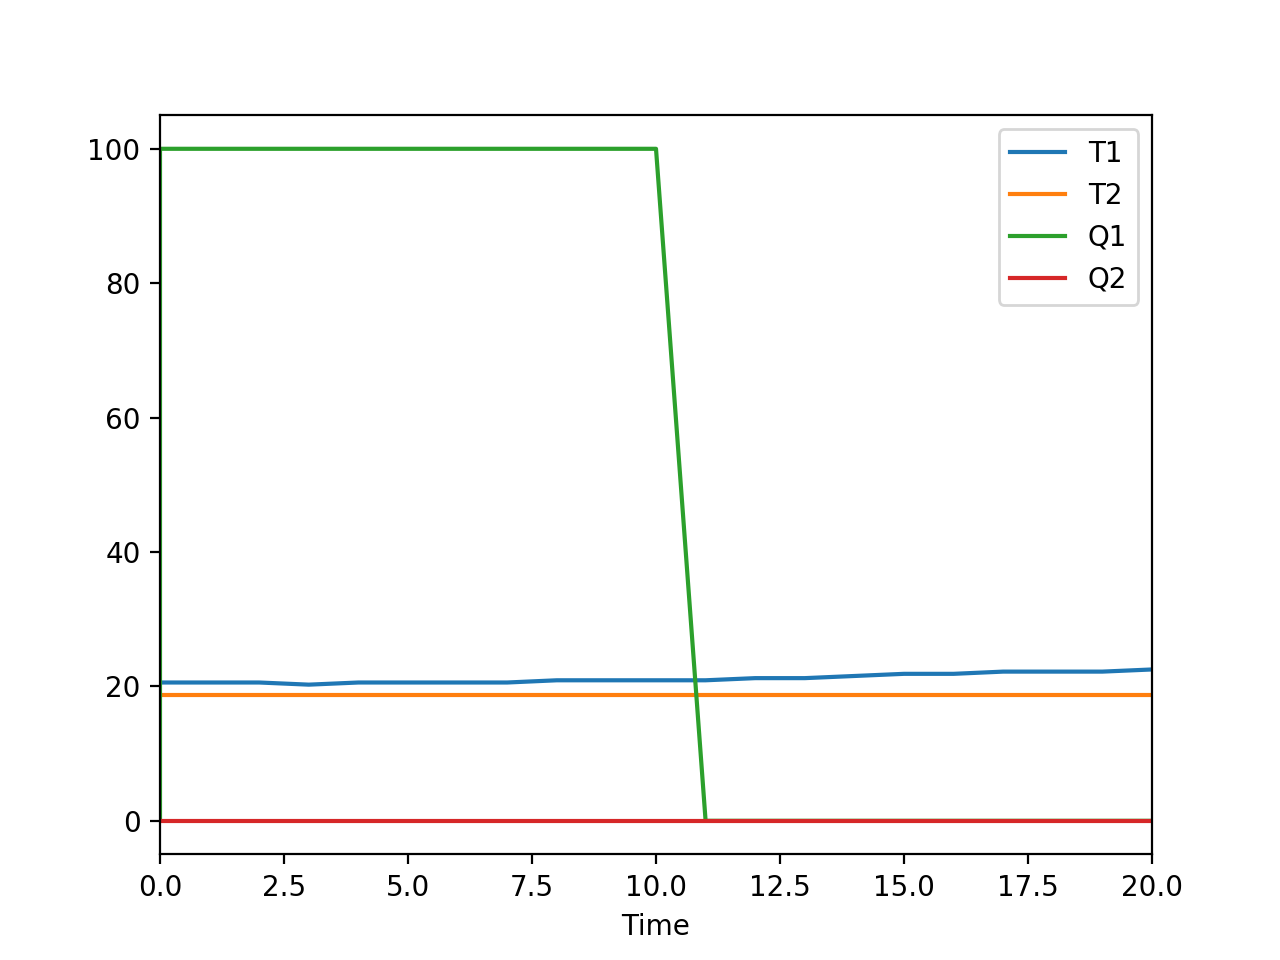

In [24]:
df.plot()

<IPython.core.display.Javascript object>


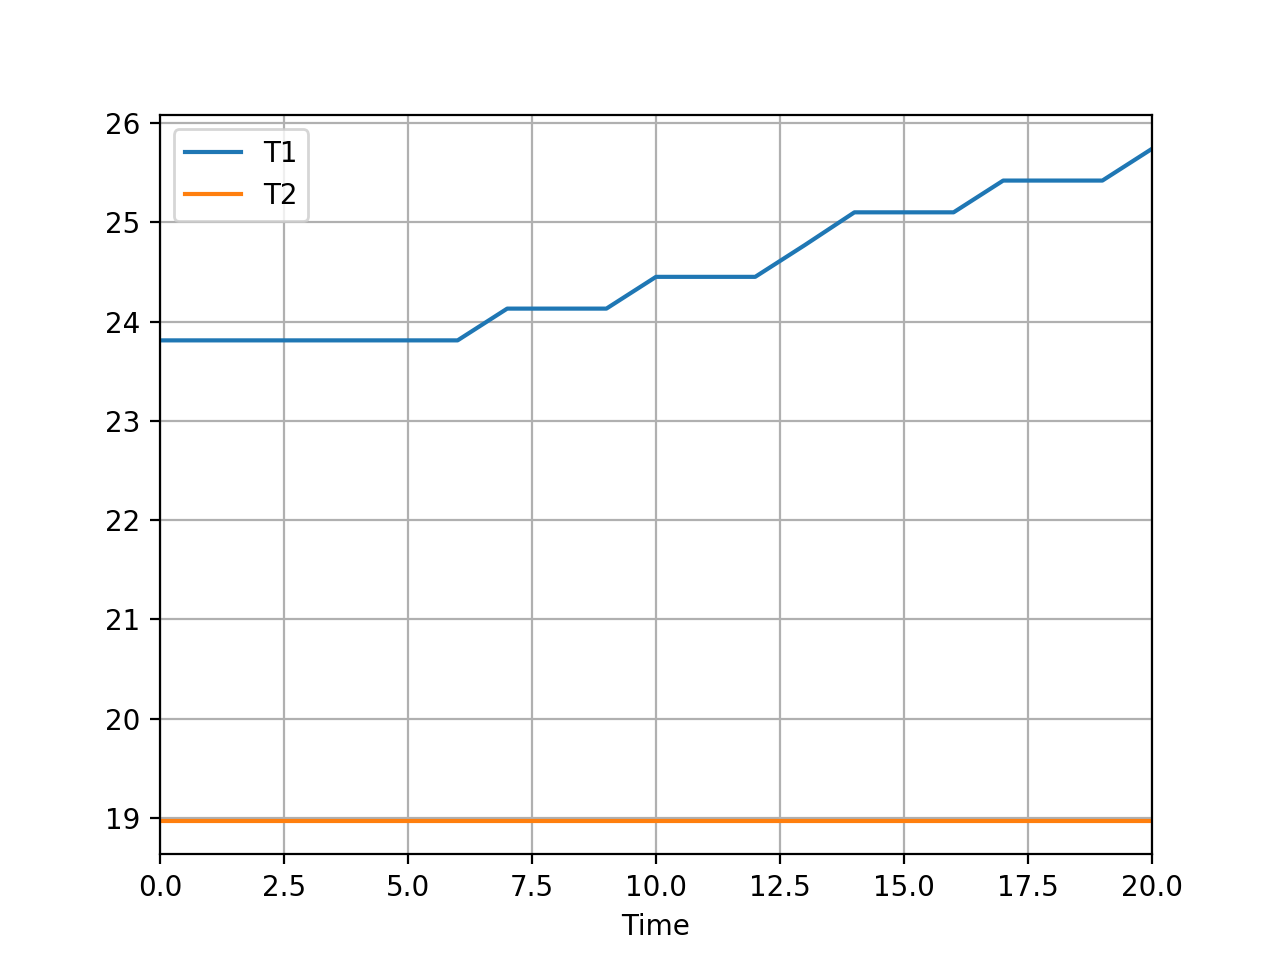

In [7]:
df[['T1','T2']].plot(grid=True)

## Specifying Sources for `tclab.Historian`

An instance of `tclab.Historian` created by specifying a set of sources which are to logged during the course of an experiment. For many cases the default sources created for an instance of TCLab is sufficient. However, it is possible to additional sources which can be useful when implementing more complex algorithms for process control.

Sources a specified as a list of tuples. Each tuple as two elements. The first element is a label for the source. The second element is a function that returns a value.

The following cell shows how to create a source with the label `Power` with a value equal to the estimated heater power measured in watts. (This is created on the assumption that 100% of a maximum power of 200 corresponds to 4.2 watts).

In [33]:
import tclab

with tclab.TCLab() as lab:
    sources = [
        ('T1', lambda: lab.T1),
        ('Power', lambda: lab.P1*lab.U1*4.2/(200*100))        
    ]
    h = tclab.Historian(sources)
    for t in tclab.clock(20):
        lab.Q1(100 if t <= 10 else 0)
        print("Time:", t, 'seconds')
        h.update(t)        

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.
Time: 0 seconds
Time: 1.0 seconds
Time: 2.0 seconds
Time: 3.0 seconds
Time: 4.0 seconds
Time: 5.0 seconds
Time: 6.0 seconds
Time: 7.0 seconds
Time: 8.0 seconds
Time: 9.0 seconds
Time: 10.0 seconds
Time: 11.0 seconds
Time: 12.0 seconds
Time: 13.0 seconds
Time: 14.0 seconds
Time: 15.0 seconds
Time: 16.0 seconds
Time: 17.0 seconds
Time: 18.0 seconds
Time: 19.0 seconds
Time: 20.0 seconds
TCLab disconnected successfully.


In [35]:
import pandas as pd

df = pd.DataFrame.from_records(h.log, columns=h.columns, index='Time')
df.head()

,T1,Power
Time,,
0.0,19.62,0.0
0.0,19.62,4.2
1.0,19.62,4.2
2.0,19.62,4.2
3.0,19.62,4.2


# TCLab Plotter

When operating in a Jupyter Notebook, a `Plotter` can be used together with the `Historian`.  

    h = Historian(a)
    p = Plotter(h, tfinal)
    
where `a` is a `TCLab` instance as before and the optional parameter `tfinal` provides an initial scaling of the time axes. Each call to `p.update()` will automatically update both the historian and the plot.

Arduino Leonardo connected on port /dev/cu.usbmodemWUAR1 at 115200 baud.
TCLab Firmware 1.3.0 Arduino Leonardo/Micro.


<IPython.core.display.Javascript object>


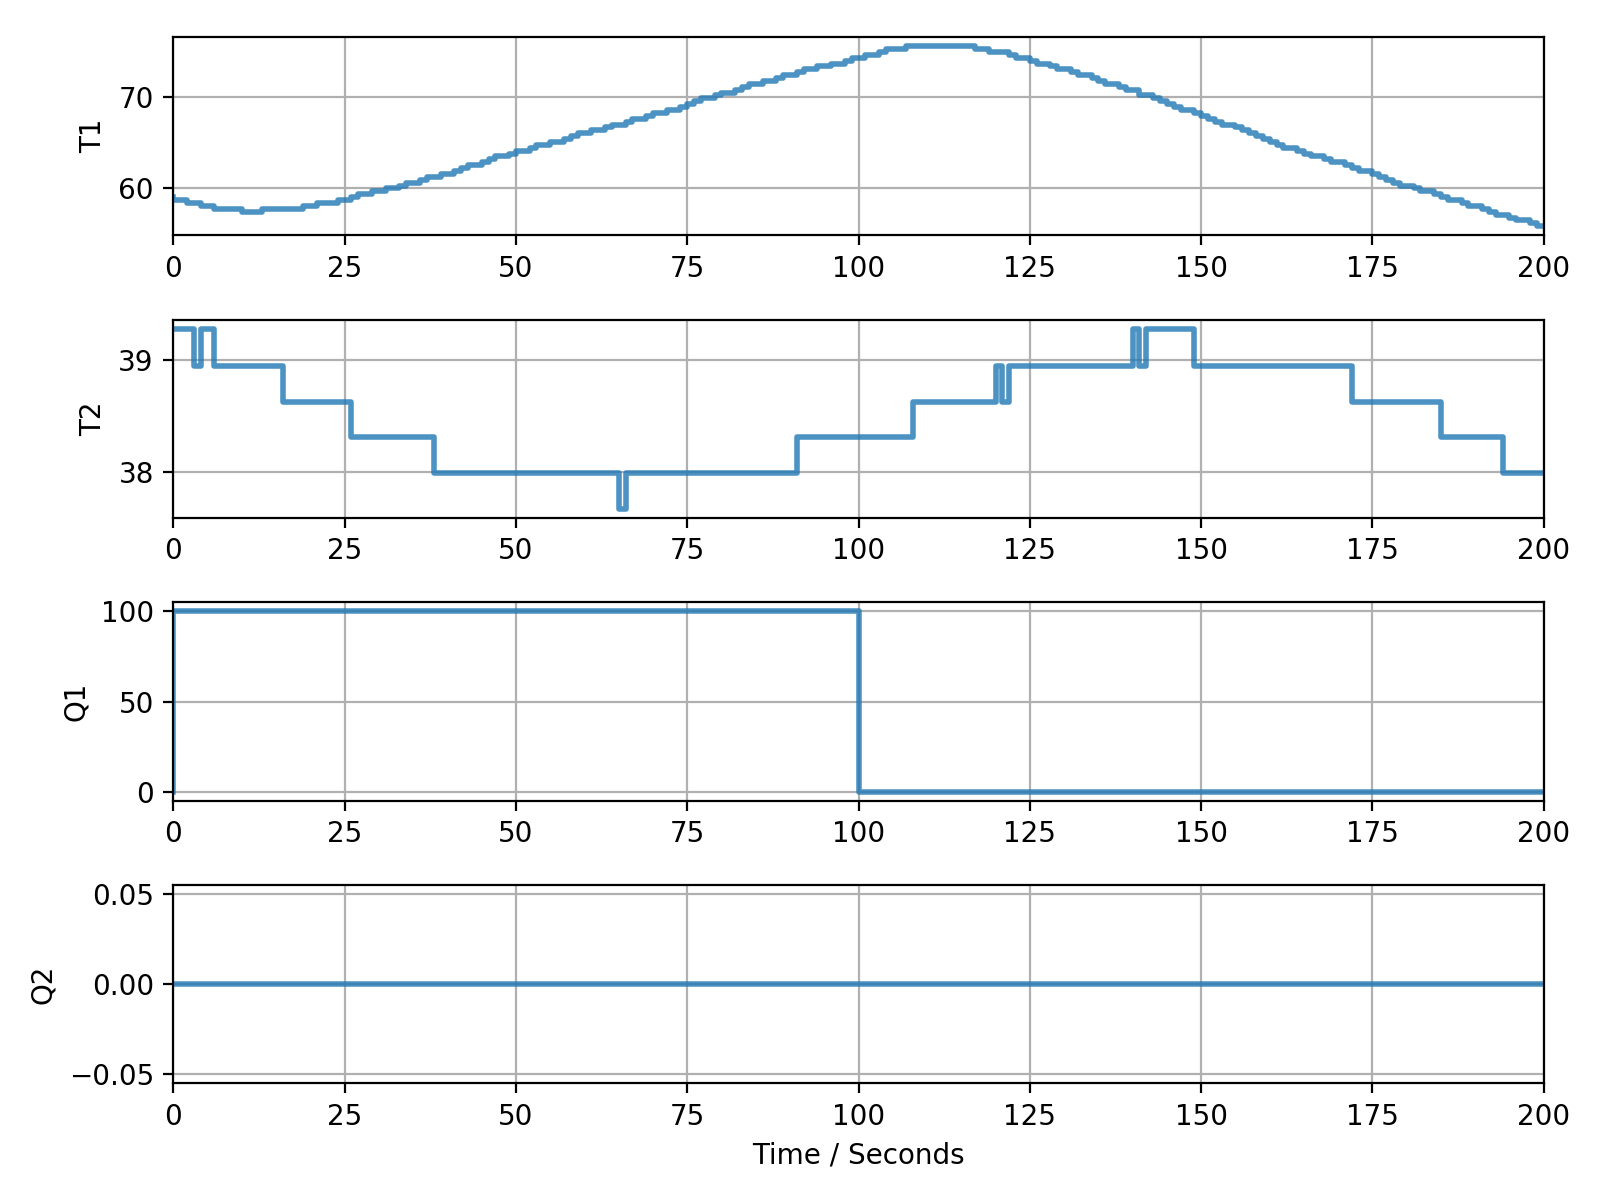

TCLab disconnected successfully.


In [1]:
%matplotlib notebook
from tclab import TCLab, clock, Historian, Plotter

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        p.update(t)

# Simulation of TCLab for Offline Use

`TCLabModel` replaces `TCLab` for occasions where the TCLab hardware might not be available. To use, include the import

    from tclab import TCLabModel as TCLab 
    
The rest of your code will work without change. Be advised the underlying model used to approximate the behavior of the Temperature Control Laboratory is an approximation to the dynamics of the actual hardware.

In [1]:
from tclab import TCLabModel as TCLab

with TCLab() as a:
    print("Temperature 1: {0:0.2f} °C".format(a.T1))
    print("Temperature 2: {0:0.2f} °C".format(a.T2))

Simulated TCLab
Temperature 1: 21.02 °C
Temperature 2: 21.11 °C
TCLab Model disconnected successfully.


As an additional example.

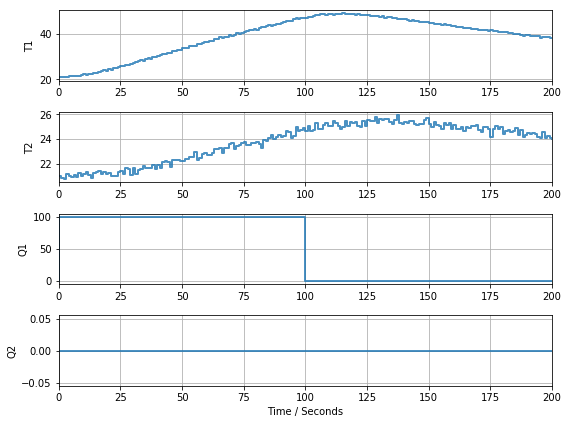

TCLab Model disconnected successfully.


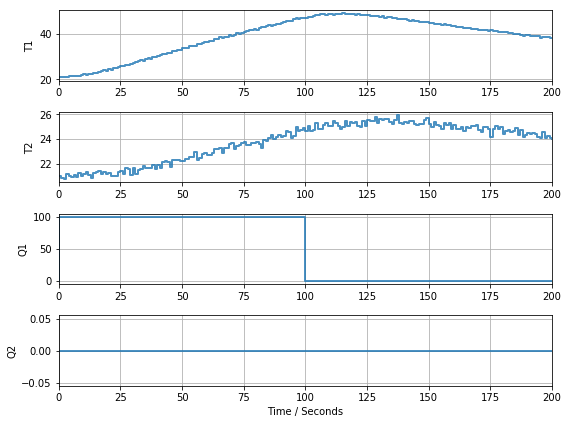

In [2]:
%matplotlib inline
from tclab import TCLabModel as TCLab
from tclab import clock, Historian, Plotter

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        p.update(t)

### Speedup Factor with `setup()`

The setup function provides control over the use of the TCLab hardware or model. If using a model, an option to run at a multiple of real-time.

A speedup of 10 or greater causes the simulation to run as fast as possible.

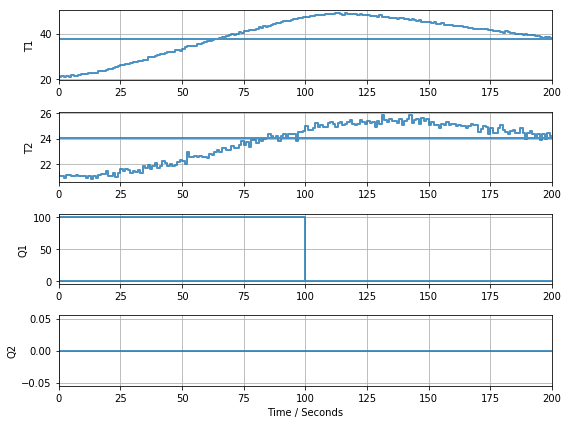

TCLab Model disconnected successfully.


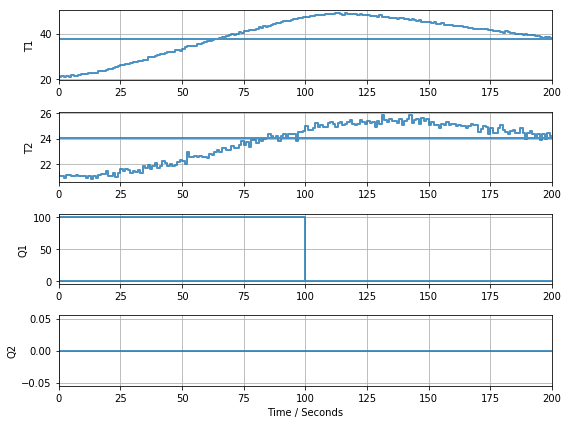

In [3]:
%matplotlib inline
from tclab import clock, Historian, Plotter, setup

TCLab = setup(connected=False, speedup=20)

with TCLab() as a:
    h = Historian(a.sources)
    p = Plotter(h, twindow=200)
    for t in clock(200):
        a.Q1(100 if t < 100 else 0)
        h.update(t)
    p.update()

# Interactive and Non-blocking Operation

The `tclab.gui` module supplies a graphical interface to the Temperature Control Laboratory.

In [1]:
from tclab.gui import NotebookUI

In [2]:
%matplotlib notebook

In [ ]:
interface = NotebookUI()

In [ ]:
interface.gui

## Accessing past sessions
Once you have finished the experiment, you can see what sessions the historian stored as follows:

In [ ]:
interface.historian.get_sessions()

The historian can load data from one of the previous sessions. Note that this will overwrite the data currently stored in the historian.

In [ ]:
interface.historian.load_session(1)

Once the data have been loaded, the historian will support all the same commands as if only one session was used.

In [ ]:
interface.historian.log

## Non-blocking Operation

In [ ]:
import threading, time

next_call = time.time()

def foo():
  global next_call
  print(datetime.datetime.now())
  next_call = next_call+1
  threading.Timer( next_call - time.time(), foo ).start()

#foo()

def bar():
    clock.send(None)

def clock(tperiod):
    tstart = time.time()
    tfinish = tstart + tperiod
    t = 0
    while t + tstart < tfinish:
        z = yield t
        t += 1

def bar():
    clock.send(2)

## Graphics Testing

Notebook to test graphics during development.

In [ ]:
%matplotlib notebook
from tclab import setup
from tclab import Historian, Plotter, clock
import time

tic = time.time()
lab = setup(connected=False, speedup=10)
with lab() as a:
    h = Historian(a.sources)
    p = Plotter(h, 200, layout=(('T1', 'T2'), ('Q1', 'Q2')))
    for t in clock(200):
        a.U1 = 80
        p.update(t)
toc = time.time()

print(toc-tic, 'seconds')

In [ ]:
from tclab import TCLabModel,  Historian, Plotter
import threading, time

tstep = 1
tperiod = 20

tstart = time.time()
tfinish = tstart + tperiod
tnext = tstart

a = TCLabModel()
h = Historian(a.sources)
p = Plotter(h,20)
a.U1 = 100


def tasks(tnext):
    global tnext, tfinish, tstep
    p.update(tnext-tstart)
    tnext = tnext + tstep
    if tnext <= tfinish:
        threading.Timer(tnext-time.time(), update).start()
    else:
        a.close()

update()

In [ ]:
%matplotlib notebook

import time
from threading import Timer
from tclab import setup, Historian, Plotter

lab = setup(connected=False, speedup=1)
a = lab()
h = Historian(a.sources)
p = Plotter(h)

SP = 40

tstart = time.time()
def loop():
    PV = a.T1
    MV = 100 if PV < SP else 0
    a.U1 = MV
    p.update(time.time()-tstart)

for t in range(0,100):
    Timer(t, loop).start()
Timer(100,a.close).start()

In [ ]:
SP = 20

In [ ]:
import threading, time, datetime

def loop():
    yield
    print(datetime.datetime.now())
    threading.Timer(1000, lambda: next(loop_gen)).start()
    
loop_gen = loop()
next(loop_gen)


In [ ]:
import asyncio

async def slow_op(n):
    await asyncio.sleep(n)
    print("Slow Op:", n)
    
async def main():
    await asyncio.wait([slow_op(3),slow_op(2),slow_op(1)])
    
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

## Testing

## Temperature Sampling Speed

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        meas.append(a.T1)
    toc = time.time()

print('Reading temperature at', round(N/(toc-tic),1), 'samples per second.')

## Heater Sampling Speed

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        a.Q1(100)
    toc = time.time()

print('Setting heater at', round(N/(toc-tic),1), 'samples per second.')

In [ ]:
import time
from tclab import setup, clock

lab = setup(connected=True)

N = 100
meas = []
with lab() as a:
    tic = time.time()
    for k in range(0,N):
        meas.append(a.scan())
    toc = time.time()

print('Reading temperature at', round(N/(toc-tic),1), 'samples per second.')

## Working with Tornado

This is an experiment to build a non-blocking event loop for TCLab.  The main idea is to implement the main event loop as a generator, then use Tornando's non-blocking timer to send periodic messages to the generator.

In [ ]:
%matplotlib inline
import tornado
import time
from tclab import setup, Historian, Plotter

SP = 40
Kp = 10

def update(lab):
    t = 0
    h = Historian(lab.sources)
    p = Plotter(h,120)
    while True:
        PV = lab.T1
        MV = Kp*(SP-PV)
        lab.U1 = MV
        p.update(t)
        yield
        t += 1

lab = setup(connected=True)
a = lab()
update_gen = update(a)
timer = tornado.ioloop.PeriodicCallback(lambda: next(update_gen), 1000)
timer.start()

In [ ]:
timer.stop()
a.close()

## Working with Widgets

`tclab.clock` is based on a generator, which maintains a single thread of execution. One consequence is that there is no interaction with Jupyter widgets.

In [ ]:
from ipywidgets import interactive
from IPython.display import display
from tclab import clock

Kp = interactive(lambda Kp: Kp, Kp = 12)
display(Kp)

for t in clock(10):
    print(t, Kp.result)

In [ ]:
import tornado
from ipywidgets import interactive
from IPython.display import display
from tclab import TCLab, Historian, Plotter

Kp = interactive(lambda Kp: Kp, Kp = (0,20))
SP = interactive(lambda SP: SP, SP = (25,55))
SP.layout.height = '500px'

def update(tperiod):
    t = 0
    with TCLab() as a:
        h = Historian(a.sources)
        p = Plotter(h)
        while t <= tperiod:
            yield
            p.update(t)
            display(Kp)
            display(SP)
            a.U1 = SP.result
            t += 1
        timer.stop()

update_gen = update(20)
timer = tornado.ioloop.PeriodicCallback(lambda: next(update_gen), 1000)
timer.start()

In [ ]:
from ipywidgets import interactive
from tclab import setup, clock, Historian, Plotter

def proportional(Kp):
    MV = 0
    while True:
        PV, SP = yield MV
        MV = Kp*(SP-PV)

def sim(Kp=1, SP=40):
    controller = proportional(Kp)
    controller.send(None)

    lab = setup(connected=False, speedup=20)
    with lab() as a:
        h = Historian(a.sources)
        p = Plotter(h,200)
        for t in clock(200):
            PV = a.T1
            MV = controller.send([PV,SP])
            a.U1 = MV
            h.update()
        p.update()   

interactive_plot = interactive(sim, Kp=(0,20,1), SP=(25,60,5), continuous_update=False);
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

In [ ]:
timer.stop()